<a href="https://colab.research.google.com/github/yajima-yasutoshi/DataScience2025/blob/main/20251209/%E5%9F%BA%E7%A4%8E%E9%9B%86%E8%A8%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 基礎集計

## 資料保管場所

20251209

https://github.com/yajima-yasutoshi/DataScience2025/tree/main/20251209


# 講義の目的

データ分析の基本となるデータの操作方法を理解する。

*   Pandas データフレームの基本的な操作法
  * データの読み込み
  * データの加工や変換

*   基礎集計（データ集計）

#準備
データ分析に必要な Python ライブラリー（モジュール）のインストールと読み込みを実施する。

In [ ]:
# 分析で必要となるライブラリーの読み込み
import numpy as np
import pandas as pd

## モジュールを使うための設定（import文）

Python言語では、様々な機能が「モジュール」として提供されている。
この講義ではデータ分析に欠かせない Pandas を用いる。

モジュールを使うためには、
プログラムの中に以下のようは import 文が必要である。
```
import モジュール名
```

モジュール名が長い場合、以下のように  「as ○○」とすることで
名前を短縮できる。
短縮名は自由に変更が可能である。

```
import モジュール名 as 短縮名
```

例えば、pandas モジュールは、
```
import pandas as pd
```
とすることで、pd と省略して用いることが多い。

## データ準備
データを Google Colab の環境で使うための手順は以下の通りである。


### ファイルの取得

今回の講義で必要となるデータは、以下のサイト

https://github.com/yajima-yasutoshi/shunan-u/tree/main/data

に保存されている 「customer_data.xlsx」 である。
このファイルを各自の PC にダウンロードする。
ダウンロードする PC のフォルダーはどこでも構わない。

### ファイルの Google Drive へのアップロード
1. Google Drive にアクセス
1. 適当なフォルダーを開く（必要であれば新たに作成）
2. PCのファイルをドラッグ＆ドロップでアップロード  
あるいは、Google Driveで右クリックでメニューを開き、ファイルのアップロードを選択してもアップロードが可能である。

### ドライブのマウント
1. Colab に移り、左端のフォルダーのアイコン

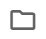

  をクリックし、ファイルメニューを開く
2. マウントアイコンをクリックし Google Driveをマウント
3. drive の中の「MyDrive」が Google Drive のマイドライブとなる

### Colabでファイルパスの取得
1. Driveメニュー内で目的のファイルの場所に移動
1. ファイルにマウスを合わせ、ファイル名の右にある縦3つの「・」部分をクリックして「パスをコピー」を選択
1. プログラムコードの中で、ctrl+v でペースト

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# データをファイルから読み込む


データ分析でまず必要になる作業は、
データをファイルから読み込むことである。
Pandas で扱うことができる主なファイルには、エクセルやCSVファイルがある。

今回はエクセルファイルを Python環境に読み込む。
これには、
Pandas モジュールの read_excel() 関数を使う。


なお、以下のコードセルで

    file_path = '/content/drive/MyDrive/データアップロード/customer_data.xlsx'

の部分は各自のファイル保管場所に合わせて変更する。



以下のコードセルを実行することで、
変数 file_path で指定したエクセルファイルのデータが
変数 data に格納される。




変数 data は、**データフレーム**と呼ばれる。


In [ ]:
# Pandas モジュールのインポート
import pandas as pd
# 読み込むファイルを指定する
# ファイルパスは、シングルクオーテーションで囲む必要がある。
file_path = '/content/drive/MyDrive/データ/customer_data.xlsx'

# ファイルのデータを data という変数に読み込む
data = pd.read_excel(file_path)

Pandas モジュールをインポートする際に、
```
import pandas as pd
```
と **pd** という省略名を付与たので

```
pd.read_excel(file_path)
```
としていることに注意する。

#データの構造把握

データフレームに読み込まれたデータの構造を把握する
ための方法について説明する。

## 項目の一覧

info() 関数を実行すると、
データの項目一覧が得られる。

In [ ]:
#データの項目一覧の表示
data.info()

各項目の型は Dtype に示されている。
Dtype と型の関係性は以下のとおりである。

Dtype | 型
-- | --
datetime?? | 日付型
int??, float?? | 数値型
object | カテゴリ型


##データの定義 (各列の説明)

customer_data.xlsx は、
あるサービスに登録したユーザのデータである。
各項目の意味は以下の通りである。


列名 | 型 | 説明
--   | -- | --
顧客ID | 数値（整数） | 顧客に個人に割り振られたID番号
性別	 | カテゴリ型 | 顧客の性別
年齢	 | 数値（整数）| 顧客の年齢
職業	 | カテゴリ型| 顧客の職業
年収	 | 数値（整数）| 顧客の年収。単位は万円
スマホの所有	| カテゴリ型 | スマートフォンの所有状態
スマホ利用時間	| 数値（実数）| スマートフォンの1日の平均使用時間
Aの利用回数	|  数値（整数）| サービスＡの利用回数
Bの利用回数 |  数値（整数） | サービスＢの利用回数


## 行数と列数表示

データの行数と列数を調べるためには、shape を用いる。

In [ ]:
data.shape

data.shape は要素が2つあるタプルである。
最初の要素がレコード数、2番目の要素が項目数である。

もし、レコード数のみを得たいのであれば以下のようにすればよい。

In [ ]:
data.shape[0]

## データを表示
head() を使うことで、
データの先頭から数行分を表示させることが可能である。


In [ ]:
# データの最初の5行を表示する
pd.options.display.float_format = '{:.2f}'.format  # 小数点以下2桁で表示
data.head()

ここで、
NaNと表示されているのは数値が入力されいないことを意味しており、
 **欠損値**
あるいは
 **欠測値**
 と呼ぶ。


In [ ]:
# 最後の 10 行を表示する
data.tail(10)

# 基本的な統計量の表示

describe() を使うことで基本的な統計量を確認できる。

数値型の項目に対しては以下の数値を確認することができる。
* データ個数
* 平均（mean）
* 標準偏差
* 最小値
* 第一四分位数（25%）：小さい方から25％の値
* 第二四分位数（50%）：小さい方から50％の値
* 第三四分位数（75%）：小さい方から75％の値
* 最大値


In [ ]:
# describe() では、数値型の項目だけが表示される
pd.options.display.float_format = '{:.2f}'.format  # 小数点以下2桁で表示
data.describe()

### 四分位数

小さい方から25%（四分の一）のデータを第一四分位と呼ぶ。
特に、**第二四分位は中央値**とも呼ばれる。

* 例：以下の9個数字の中央値(median)は、小さい方から5番目であり、20である。

   1, 2, 5, 10, **20**, 49, 100, 200, 210

ちなみに、平均（mean）は約 66.3 である。

この例のように、極端に大きな（小さな）データが含まれる場合には、
平均と中央値が大きく異なるため、
平均は全体を代表する統計量として適切でないこともありうる。


また、カテゴリ型のデータに対しては、以下の数値が確認できる
* NULLでないレコード数数
* ユニーク数（カテゴリ値の個数）
* 最頻値
* 最頻値のレコード数

カテゴリ型の項目に対しては、以下のように describe を使う必要がある。

In [ ]:
# カテゴリ型の項目に対しては、以下のように describe を使う。異なる値の数と最頻値が算出される。
data.describe(include='object')

# データクレンジング
代表的なデータクレンジングとして、以下の3つを扱う

*   欠損値の処理
*   異常値の削除
*   重複レコードの削除



## 欠損値の処理

以下の方法で、列毎に欠損値の個数が集計できる。

In [ ]:
# 欠損値の個数を調べる
# data という変数に読み込む
data = pd.read_excel(file_path)
data.isnull().sum()

## NULLのレコードを削除する

もっとも単純な欠損値の処理は、
欠損値を含むレコードを削除することである。これには、

```
dropna()
```
を用いる。

In [ ]:
# data という変数に読み込む
data = pd.read_excel(file_path)
# print( data.isnull().sum() )
data = data.dropna()
data.isnull().sum()

In [ ]:
# data の性別と職業がNULLのレコードを削除する

# data という変数に読み込む
data = pd.read_excel(file_path)

data = data.dropna(subset=['性別', '職業'])
data.isnull().sum()

### 数値で置き換える場合

    fillna()

を使うことで、欠損値部分を指定したデータで置き換えることができる。


In [ ]:
data = pd.read_excel(file_path)

# 年収の欠損値を0で補完
data['年収'] = data['年収'].fillna(0)

# スマホ利用時間の欠損値を平均値で補完
m = data['スマホ利用時間'].mean()
data['スマホ利用時間'] = data['スマホ利用時間'].fillna(m)

## 異常値の削除

全体の分布から大きく外れた数値を異常値（あるいは外れ値）と呼ぶ。

数値型の列の場合、
異常値の考え方の主なものは以下の2つである。

*  平均から標準偏差の3倍以上離れたもの
*  四分位範囲（第三四分位と第一四分位の差）を用いたもの
  *  第三四分位＋「四分位範囲」×1.5 より大
  *  第一四分位－「四分位範囲」×1.5 より小

カテゴリ型の場合には、レコード数が極端に少ないカテゴリを
異常値と考え、「その他」として集約することが行われる場合がある。

In [ ]:
#年齢が、平均値から標準偏差の3倍以上離れているレコードを抽出する

# data という変数に読み込む
data = pd.read_excel(file_path)

# 年齢の平均値と標準偏差を計算
age_mean = data['年齢'].mean()
age_std = data['年齢'].std()

# 平均値から標準偏差の3倍以上離れているレコードのインデックス（レコード）を取り出す
indices_to_drop = data[(data['年齢'] < age_mean - 3 * age_std) | (data['年齢'] > age_mean + 3 * age_std)].index

data_dropped = data.drop(indices_to_drop)

# 確認する
data_dropped['年齢'].max()

In [ ]:
# data という変数に読み込む
data = pd.read_excel(file_path)

# data を更新する場合には以下のように inplace=True と指定して実行する
data.drop(indices_to_drop, inplace=True)

In [ ]:
# 確認する
data['年齢'].max()

## 重複レコードの削除

In [ ]:
# 重複した行が存在していることも確認する

# もう一度データを読み込みなおす
data = pd.read_excel(file_path)
data.tail()

In [ ]:
# 重複した行を削除する
data.drop_duplicates(inplace=True)
data.tail()

# 主なDataFrame の操作

In [ ]:
# 再度データを変数 data に読み込む
data = pd.read_excel(file_path)
# NULL を含むレコードを削除する
data = data.dropna()

## 並べ替え（ソート）

In [ ]:
# 年齢の小さい順に並べる（昇順（ascending:アセンディング）とも呼ぶ）
# 並べ替えの対象となる列名を指定する。
# シングルクオーテーション(')が必要。
data.sort_values('年齢')

In [ ]:
# 大きい順に並べる（降順と呼ぶ）場合は、ascending=False を追加する。
data.sort_values('年齢', ascending=False)

In [ ]:
# by = '列名' としてもよい
data.sort_values(by = '年齢', ascending=False)

In [ ]:
# 並べ替え、先頭の10行を表示する場合
data.sort_values('年齢', ascending=False).head(10)

In [ ]:
# 同じ大きさのデータの場合に、さらに別項目でソートを行うことができる
# まず、年齢で並べ、同じ年齢の場合は、顧客IDで並べる場合。
data.sort_values(['年齢','顧客ID'],).head(10)

In [ ]:
# まず、年齢で並べ、同じ年齢の場合は、顧客IDで並べる場合。
# ただし、年齢は大きなものから並べ、年齢が同じ場合は顧客IDの小さなものから並べる場合は、以下のように行う
data.sort_values(['年齢','顧客ID'], ascending=[False, True]).head(10)

## 行の選択

### 行数で選択する

In [ ]:
# 20行目から21行目までを表示。列は全て選ばれる。
data[20:22]

### 条件式で選択する

In [ ]:
# 年齢が30未満の行を選択
data[ data['年齢'] < 30]

In [ ]:
data[ data['職業']=='会社員']

In [ ]:
data[ data['職業']=='会社員'].head(3)

In [ ]:
# 年齢が50歳より大きいレコード
data[(data['年齢'] > 50) ].head()

In [ ]:
# 複数の条件式を組合わせることも可能
# OR 条件で組み合わせた例
data[(data['年齢'] < 11) | (data['年齢'] > 60)].head()

## 列の選択

列名を指定することで、列の選択が可能である。

In [ ]:
selected_data = data[['顧客ID', '性別', '年齢']]

In [ ]:
selected_data.head()

## 列名の変更

In [ ]:
# 列名を変更したいのであれば、以下のように行う
data.rename(columns={'年収': '収入'})

# 基礎集計


In [ ]:
# 再度データを変数 data に読み込む
data = pd.read_excel(file_path)
# NULL を含むレコードを削除する
data = data.dropna()

## 基本的な統計量の算出

In [ ]:
# 特定の列の平均
data['スマホ利用時間'].mean()

data['スマホ利用時間'].mean() の mean()の部分は以下の関数に変更ができる

関数 | 意味
--   | --
mean() | 平均
median() | 中央値
min() | 最小値
max()	| 最大値
std() | 標準偏差
var() | 分散
quantile(0.25)	| 第一四分位（25%）
quantile(0.75)	| 第三四分位（75%）
nunique() | カテゴリ型の値の個数  
unique()  | カテゴリ型の値を表示する


##カウント

In [ ]:
# 再度データを変数 data に読み込む
data = pd.read_excel(file_path)

In [ ]:
# カテゴリ型の項目に対して、値の種類を調べる
data['職業'].unique()

In [ ]:
# 値毎のレコード件数を表示させる。
# 欠損値が含まれないので注意
data['職業'].value_counts()

# 他の列も確認する場合
# data['性別'].value_counts()
# data['スマホの所有'].value_counts()

In [ ]:
# 欠損値も含める場合
data['職業'].value_counts(dropna=False)

以下のように、結果を並び替えを行い表示すると見やすくなる。

In [ ]:
data['職業'].value_counts(dropna=False).sort_values(ascending=False)
# data['職業'].value_counts().sort_values()
# data['職業'].value_counts().sort_values(ascending=False).head()

normalize=True を指定して、相対値にすることができる。

In [ ]:
data['職業'].value_counts( normalize=True )

## 最頻値
カテゴリ型のデータでもっとも多く出現しているものを**最頻値**と呼ぶ。
職業であれば「その他」が最頻値となる。

In [ ]:
data['職業'].mode()

なお、最頻値が複数ある場合は、全ての最頻値が表示される。


### 複数の最頻値を持つ場合

In [ ]:
# 最頻値が複数ある場合の例
# サンプルデータを作成
df = pd.DataFrame({
    'A': ['a', 'b', 'b', 'c', 'd', 'c']
})
df.head(6)

In [ ]:
# mode を計算
df['A'].mode()

上のデータでは、最頻値が2つあり b, c 両方が最頻値である。
このような場合は、最頻値が２つ表示される

In [ ]:
data_renamed = data.rename(columns={'Aの利用回数': 'A回数','Bの利用回数': 'B回数'})
data_renamed.info()

## 行を選択して集計する

In [ ]:
# 再度データを変数 data に読み込む
data = pd.read_excel(file_path)
# NULL を含むレコードを削除する
data = data.dropna()

In [ ]:
# 年齢が50歳以上の顧客の年収の平均を求める
data[ data['年齢'] >= 50]['年収'].mean()

In [ ]:
# 選択した部分をいったん別の変数に代入したやり方でも良い
data_young = data[ data['年齢'] > 50]
data_young['年収'].mean()

In [ ]:
data[ data['職業']=='会社員']['スマホ利用時間'].median()

In [ ]:
data[ data['職業']=='会社員']['スマホ利用時間'].mean()

In [ ]:
# 複数条件をANDする
data[ (data['性別'] == '女性') & (data['年収'] >= 400) ]['年齢'].mean()

In [ ]:
# 複数条件をORする
data[ (data['職業'] == '会社員') | (data['職業'] == '公務員') ]['年収'].mean()

##インデックスを指定して削除（異常値の削除）

    drop( 削除するインデック )

を使うことで指定したレコードを削除できる。


In [ ]:
#年齢が、平均値から標準偏差の3倍以上離れているレコードを抽出する

# 再度データを変数 data に読み込む
data = pd.read_excel(file_path)

# 年齢の平均値と標準偏差を計算
age_mean = data['年齢'].mean()
age_std = data['年齢'].std()

# 平均値から標準偏差の3倍以上離れているレコードのインデックス（レコード）を取り出す
indices_to_drop = data[(data['年齢'] < age_mean - 3 * age_std) | (data['年齢'] > age_mean + 3 * age_std)].index

data_dropped = data.drop(indices_to_drop)

# 確認する
data_dropped['年齢'].max()

In [ ]:
# data を更新する場合には以下のように inplace=True と指定して実行する
data.drop(indices_to_drop, inplace=True)

In [ ]:
# 確認する
data['年齢'].max()

# 複雑な集計

分類して集計することができる。

例えば、性別で分類して年齢の平均を求める、といったことが可能である。


以下の3項目を指定する必要がある。

*   分類項目：カテゴリ属性から選択する
*   集計項目：数値属性
*   集計方法：集計方法には、平均(mean)、中央値(median)、最小(min)、最大(max)が使える。

例えば、性別で分類して年齢を平均する場合には、

*   分類項目 → 性別
*   集計項目 → 年齢
*   集計方法 → 平均

とする。

In [ ]:
# 再度データを変数 data に読み込む
data = pd.read_excel(file_path)
# NULL を含むレコードを削除する
data = data.dropna()

In [ ]:
# 性別で分類して年齢の平均を求める。
data.groupby('性別')['年齢'].mean()

In [ ]:
# 集計の結果を別のデータフレーム（変数名は new_data ）にする場合は、reset_index() を最後に着ける
new_data = data.groupby('性別')['年齢'].mean().reset_index()
new_data

In [ ]:
selected_data = data[['性別', '年齢', '年収', 'Aの利用回数', 'Bの利用回数']]

# 性別ごとに全ての項目の平均を計算することも可能
selected_data.groupby('性別').mean()


In [ ]:
selected_data = data[['性別', '職業', '年齢', '年収', 'Aの利用回数', 'Bの利用回数']]
selected_data.groupby('性別').median()
# 職業の項目は数値型ではないので、中央値を求めることができずエラーメッセージが表示される。

In [ ]:
# 数値型の列に限って集計を行う
selected_data = data[['性別', '年齢', '年収', 'Aの利用回数', 'Bの利用回数']]
selected_data.groupby('性別').median()

2つ以上の属性を組み合わせて分類して、集計することもできる。

In [ ]:
selected_data = data[['性別', '職業', '年齢', '年収', 'Aの利用回数', 'Bの利用回数']]
selected_data.groupby(['性別','職業']).mean()

集計方法も複数指定が可能である。最小値、最大値、平均を計算する方法は以下の通り

In [ ]:
data.groupby(['性別','職業'])['年齢'].agg(['min', 'max', 'mean'])

集計結果をデータフレームに変換するためには
 reset_index()
 を使うとよい。

In [ ]:
#結果をデータフレームに格納する
df = data.groupby(['性別','職業'])['年齢'].agg(['min', 'max', 'mean']).reset_index()
df

列名を変更して分かり易いデータフレームとするこもとできる。

In [ ]:
df = df.rename(columns={'min': '年齢最小', 'max':'年齢最大', 'mean':'年齢平均'})
df

# 信頼区間

収集されたデータから計算された統計量は、
必ずしも母集団の統計量と等しいとは限らない。
観測には誤差が含まれる。
そこで、真の値と比べてどの程度確からしいのかを示す指標に
**信頼区間**がある。

信頼区間とは、**ある確率**で真の値を含む範囲のことである。
確率としては0.95 (95%) が良く用いられる。
この確率を**信頼水準**と呼び、
信頼水準が95%の信頼区間を
**95%信頼区間**とよぶことがある。
まお、
確率を1に近づけるほど信頼区間は広く、
逆に確率を下げれば信頼区間は狭くなる。

平均値の信頼区間の下限と上限の計算には、
scipy の stats パッケージの t.interval を用い、
以下のようにすればよい。

```
import scipy.stats as st
lower_bound, upper_bound = st.t.interval(信頼水準, df=データの個数 - 1, loc=平均, scale=標準誤差)

```
変数 lower_bound と upper_bound に、
信頼区間の下限と上限が格納される。

ここで、
標準誤差とは平均の標準偏差のことで、
データの標準偏差をデータ数の平方根で割った値である。
stats パッケージをインポートし、
stats.sem で計算できる。



In [ ]:
import numpy as np
import scipy.stats as st

# 信頼水準を設定
confidence = 0.95
# 信頼区間を求めたいデータを変数「_data」にセットする。
_data = data['年収']

# 標本平均と標準誤差を計算
mean = _data.mean()
sem = st.sem(_data)

# 信頼区間の導出
# scipy.stats.t.interval 関数を使用して、信頼区間を求める。
lower_bound, upper_bound = st.t.interval(confidence, df=_data.shape[0] - 1, loc=mean, scale=sem)

# 信頼区間を表示
print(f"信頼区間: ({lower_bound:.2f}, {upper_bound:.2f})")


# 参考

### 行や列の限定

iloc を使い、DataFrame に格納された表の一部だけを取り出すことが可能。

基本的な使い方は、

> iloc[ 行の範囲を指定, 列の範囲を指定 ]

In [ ]:
# 0行目から2行目まで、2列目から4列目まで
data.iloc[0:3,2:5]

In [ ]:
# 0行目から2行目まで
data.iloc[0:3,:]

In [ ]:
# 1列目から最後まで
data.iloc[1:3,1:]

In [ ]:
# 1列目から最後の1つ前まで
data.iloc[1:3,:-1]

### 行番号と列番号による指定

> iloc[ 行のリスト, 列のリスト ]

In [ ]:
data.iloc[[100,1,102],[0,2,3]]

In [ ]:
# 行番号や列番号を省略すると全て選択される
data.iloc[[100,1,102],]